In [0]:
from singlestep import *

from math import sqrt
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,LSTM,Bidirectional,BatchNormalization,Dropout,Conv1D,GRU,MaxPooling1D
from keras.models import Sequential,Model
from keras.layers.merge import concatenate
from keras.callbacks import History, ModelCheckpoint
from keras import optimizers
from keras.engine.input_layer import Input
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler

In [0]:
def naya_split(data):  #CORRECT
    train,test=data[0:365*1*24+24*30*4],data[365*1*24+24*30*4:365*1*24+24*30*6]
    train=np.split(train,len(train)/24)
    test=np.split(test,len(test)/24)
    return np.array(train),np.array(test)

In [0]:
def nwo_split(data):  #CORRECT
    train,test=data[0:365*3],data[365*3:365*4-1]
    train=np.split(train,len(train)/5)
    test=np.split(test,len(test)/28)
    return np.array(train),np.array(test)

In [0]:
def main():
  data=pd.read_csv('/content/daily_changping.csv',header=0,parse_dates=True,index_col=['No'])
  data=data.reindex(columns=["O3","year","month","day","hour","SO2","TEMP","CO","PM10","PM2.5","NO2","DEWP","RAIN","PRES","WSPM"])
  #target variable ozone
  n_input=8
  min=data['O3'].min()
  max=data['O3'].max() 
  scaler = MinMaxScaler(feature_range=(0, 1))
  data = scaler.fit_transform(data)
    
  train,test=nwo_split(data)
  print(train.shape)
  print(test.shape)
  train_x,train_y=to_supervised(train,n_input,1)
  n_timesteps,n_features,n_outputs=train_x.shape[1],train_x.shape[2],train_y.shape[1]
  print(train_x.shape)
  print(train_y.shape)

  filename = '/content/modelchangpingozone.sav'
  model = pickle.load(open(filename, 'rb'))
  #model=CNN_GRU(n_timesteps)  
  for i in range(25,37):                                
   model.get_layer(index=i).trainable=False                  #freezing 
  model.compile(optimizer='adam',loss='mse') 
  history = fit_model(train_x,train_y,model,0,0)             #finetuning 

  scores,final_score= model_eval(train,test,n_input,model,28,0)
  scores=[t*(max-min)+min for t in scores]
  print(scores)
  print(final_score*(max-min)+min)




(219, 5, 15)
(13, 28, 15)
(1087, 8, 15)
(1087, 1)
Train on 978 samples, validate on 109 samples
Epoch 1/5
978/978 [==============================] - 4s 4ms/step - loss: 0.0167 - val_loss: 0.0054
Epoch 2/5
978/978 [==============================] - 2s 2ms/step - loss: 0.0163 - val_loss: 0.0055
Epoch 3/5
978/978 [==============================] - 2s 2ms/step - loss: 0.0160 - val_loss: 0.0057
Epoch 4/5
978/978 [==============================] - 2s 2ms/step - loss: 0.0159 - val_loss: 0.0061
Epoch 5/5
978/978 [==============================] - 2s 2ms/step - loss: 0.0156 - val_loss: 0.0055
model built
(364, 1)


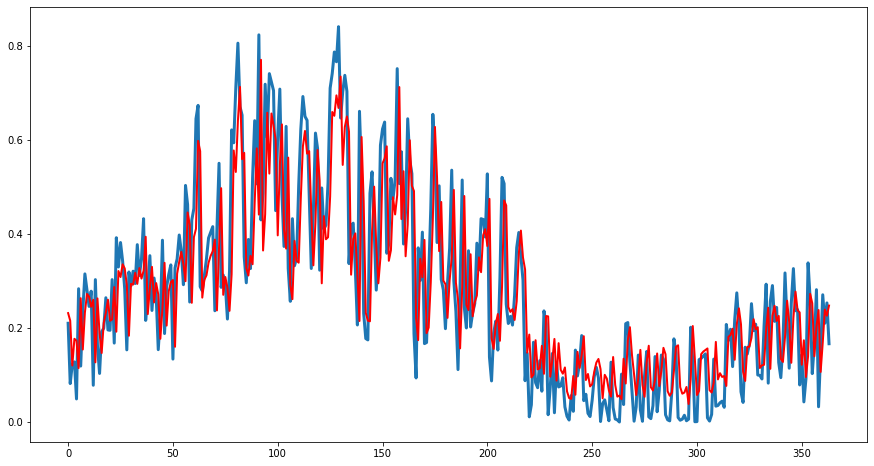

[21.294746090488204, 22.14800943241594, 19.502555130535097, 16.343228510106936, 24.070806215453345, 32.690989729491655, 23.630481841510477, 28.18223239015242, 27.123742958776344, 25.16026718051166, 22.61242760556653, 18.750796583497088, 23.378753919992405, 25.422669704201798, 18.313194918994977, 22.419978387749005, 20.967686830013818, 28.332944705356148, 22.661813746306144, 19.854293990349476, 23.2576885457788, 23.805703794447123, 34.15841311824846, 20.62617937132358, 19.557741384377955, 24.68205644118938, 17.992379823914696, 31.124828861577598]
23.932276599290137


In [0]:
if __name__=='__main__':
  main()